In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
Mean cross-validation score: 0.9466666666666667


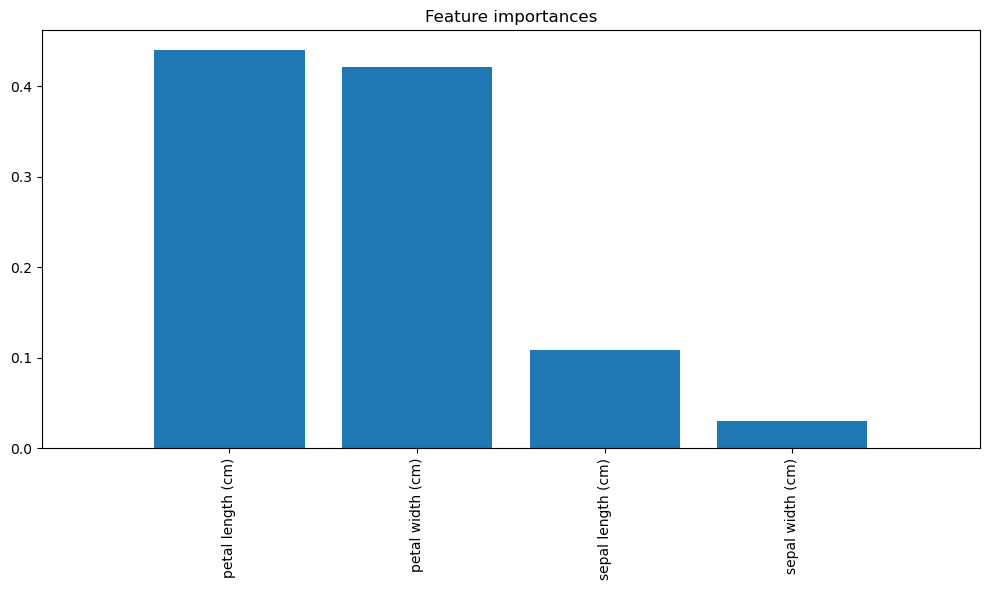

In [3]:
iris=load_iris()
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline with preprocessing and model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [0, 1, 2, 3])
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Fit the pipeline
pipeline.fit(X_train, y_train)
# Make predictions
y_pred = pipeline.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))                              
print(classification_report(y_test, y_pred, target_names=iris.target_names))
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
# Feature importance
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = iris.feature_names
indices = range(len(importances))
# Sort the feature importances in descending order
indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.tight_layout()
plt.show()
